# Exercices : Probabilit√©s et statistiques

### Exercice 1

On se donne un r√©el strictement positif $\lambda$ et une suite $(X_n)_{n \geq 1}$ de variables binomiales :

$$
X_n \sim \mathcal{B}\left(n,\ \frac{\lambda}{n}\right)
\quad \text{et une variable de Poisson} \quad Y \sim \mathcal{P}(\lambda).
$$

On sait que pour tout $k \in \mathbb{N}$ :

$$
\lim_{n \to +\infty} \mathbb{P}(X_n = k) = \mathbb{P}(Y = k).
$$

Ce th√©or√®me ne nous dit pas si, pour un entier $n$ fix√©, $\mathbb{P}(X_n = k)$ est une bonne approximation de $\mathbb{P}(Y = k)$.

On se propose de faire une **√©tude num√©rique** pour le savoir et en tirer une **r√®gle empirique**.


a) √âcrire une fonction `B(n, Lambda)` qui calcule :
$b_k = \mathbb{P}(X_n = k)$ pour tout $k \in [0, n]$
et donne en sortie le vecteur :

$$
\mathbf{b} = [b_0,\ b_1,\ \dots,\ b_n].
$$

$$
\mathbb{P}(X_n = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

ou


$$
b_k = b_{k-1} \cdot \frac{n - k + 1}{k} \cdot \frac{p}{1 - p}
$$



b) √âcrire une fonction `P(n, Lambda)` qui calcule :
$p_k = \mathbb{P}(Y = k)$ pour tout $k \in [0, n]$
et donne en sortie :

$$
\mathbf{Y} = [p_0,\ p_1,\ \dots,\ p_n].
$$

$$
\mathbb{P}(Y = k) = \frac{\lambda^k}{k!} e^{-\lambda}
$$


c) Faire tracer les **diagrammes en barres** des valeurs :

* $F_{X_n}(k)$ (loi binomiale)
* $F_Y(k)$ (loi de Poisson)

pour $0 \leq k \leq 30$ dans les cas suivants :

* $\lambda = 1,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$
* $\lambda = 2,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$
* $\lambda = 4,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$


d) **Conclusion ?** (visuelle et num√©rique)




#### Correction a) 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb, exp, factorial

# a) Loi binomiale : B(n, Œª) retourne b_k = P(X‚Çô = k)
def B(n, Lambda):
    p = Lambda / n
    b = [comb(n, k) * (p**k) * ((1 - p)**(n - k)) for k in range(n + 1)]
    return b

# Version optimis√© 
def B(n, Lambda):
    p = Lambda / n
    q = 1 - p

    b = [q**n]  # b‚ÇÄ = (1 - p)^n
    for k in range(1, n + 1):
        next_b = b[-1] * (n - k + 1) / k * (p / q)
        b.append(next_b)
    return b



#### Correction b) 

In [14]:
# b) Loi de Poisson : P(n, Œª) retourne p_k = P(Y = k)
def P_kmax(k_max, Lambda):
    p = [exp(-Lambda) * Lambda**k / factorial(k) for k in range(k_max + 1)]
    return p



#### Correction c) 

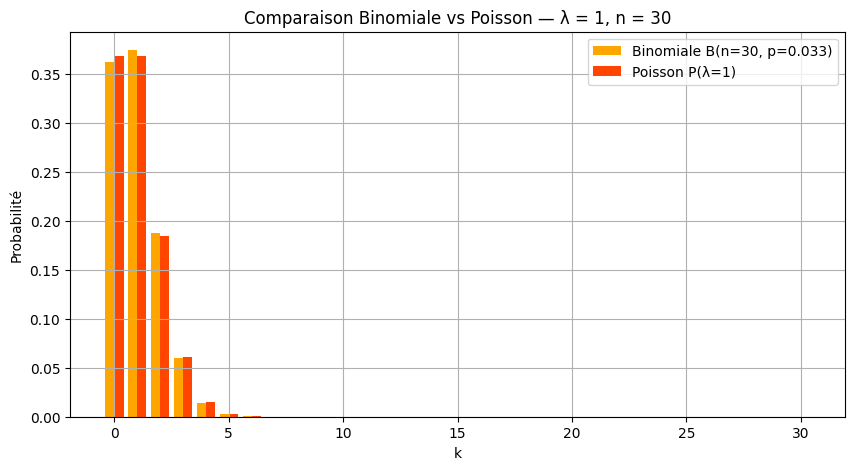

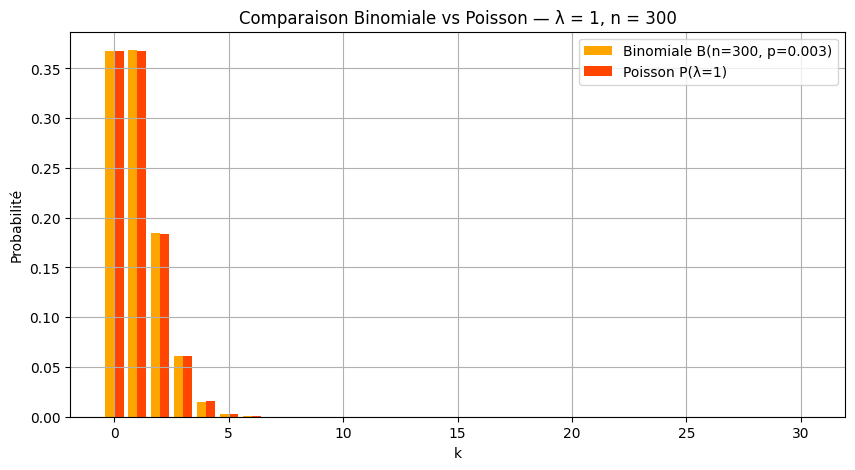

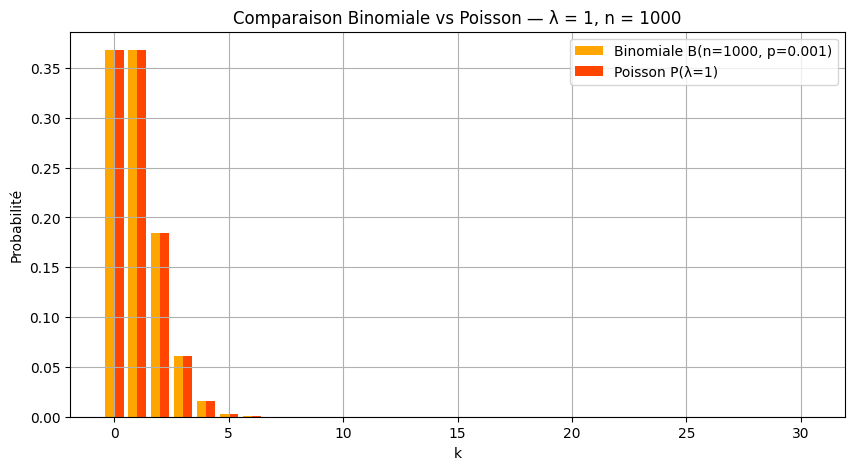

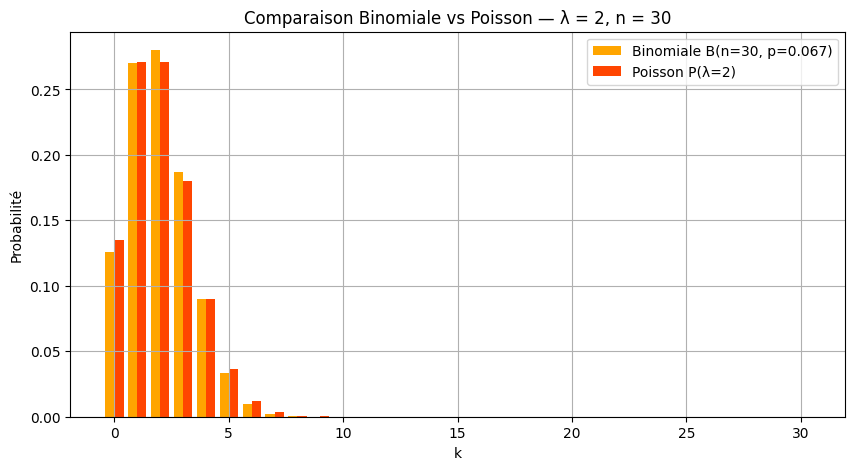

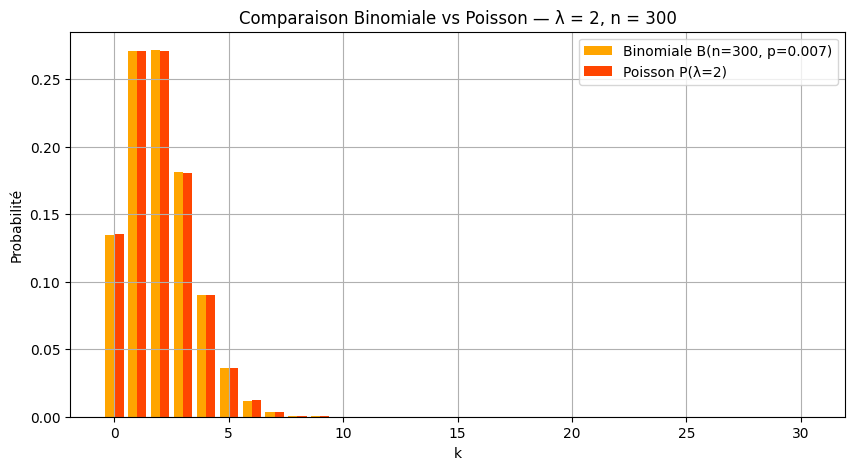

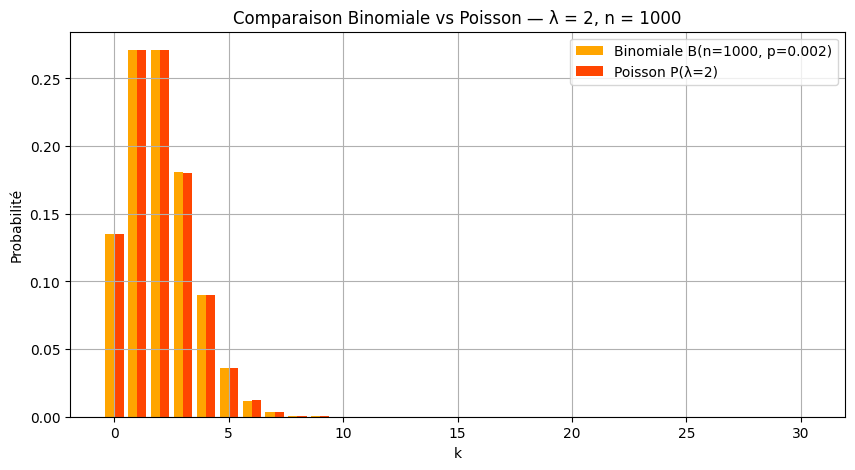

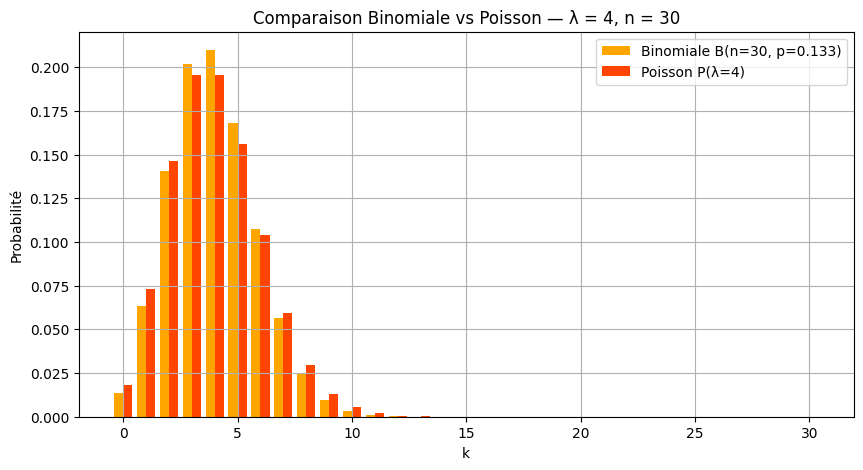

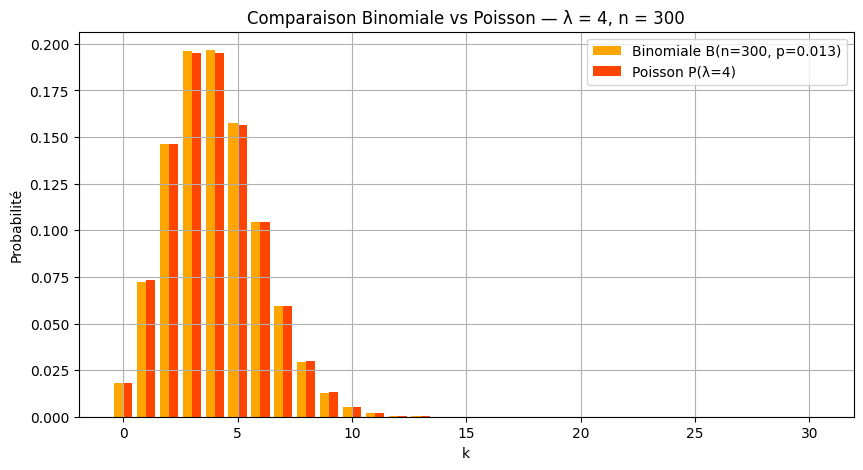

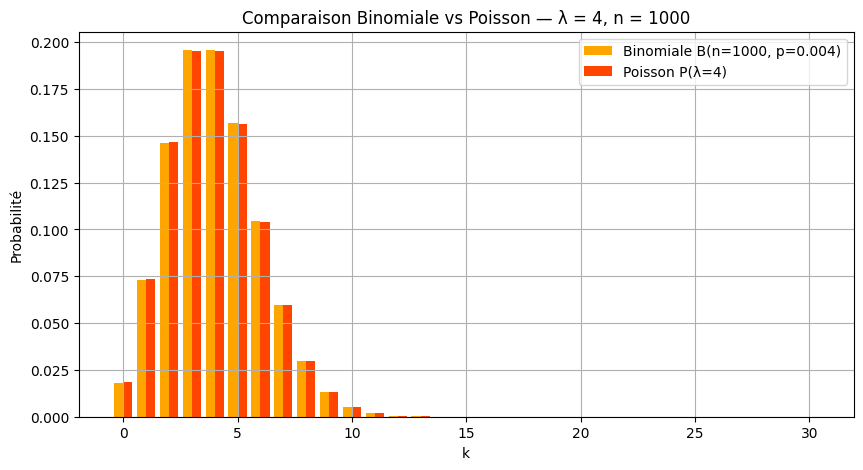

In [15]:
# c) Fonction de trac√© comparatif
def plot_distributions(n, lam, k_max=30):
    x = np.arange(0, k_max + 1)
    b_vals = B(n, lam)[:k_max + 1]
    p_vals = P_kmax(k_max, lam)

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, b_vals, width=0.4, label=f'Binomiale B(n={n}, p={lam/n:.3f})', color='orange')
    plt.bar(x + 0.2, p_vals, width=0.4, label=f'Poisson P(Œª={lam})', color='orangered')
    plt.title(f'Comparaison Binomiale vs Poisson ‚Äî Œª = {lam}, n = {n}')
    plt.xlabel('k')
    plt.ylabel('Probabilit√©')
    plt.legend()
    plt.grid(True)
    plt.show()


params = [
    (1, 30), (1, 300), (1, 1000),
    (2, 30), (2, 300), (2, 1000),
    (4, 30), (4, 300), (4, 1000),
]

for lam, n in params:
    plot_distributions(n, lam, k_max=30)
    

##### **Conclusions g√©n√©rales sur l‚Äôapproximation de la loi binomiale par la loi de Poisson** :

##### üîπ 1. **Quand $n$ augmente, l‚Äô√©cart diminue**

* Pour un **$\lambda$ fix√©**, plus **$n$** est grand, plus les histogrammes de la **binomiale** et de la **Poisson** se **confondent**.
* Cela confirme le th√©or√®me de convergence :

  $$
  \text{Si } X_n \sim \mathcal{B}\left(n,\ \frac{\lambda}{n}\right), \quad \text{alors } X_n \xrightarrow[]{\mathcal{L}} \mathcal{P}(\lambda)
  $$

##### üîπ 2. **La qualit√© de l‚Äôapproximation d√©pend de $\lambda$** aussi :

* Pour un **$n$ fix√©**, l‚Äôapproximation est **meilleure pour les petits $\lambda$**.
* Si $\lambda$ augmente trop (ex. $\lambda = 4$) et que $n$ reste petit, la binomiale est **plus dispers√©e** que la Poisson.


##### üîπ 3. **R√®gle empirique** :

On peut retenir la **r√®gle classique** :

> ‚úÖ La loi de Poisson est une **bonne approximation** de la loi binomiale $\mathcal{B}(n, p)$
> quand $n$ est **grand**, $p$ est **petit**, et $\lambda = np$ est **mod√©r√©** (typiquement $\lambda < 5$).


### Exercice 2

Supposons avoir import√© la biblioth√®que `numpy.random` avec le raccourci `rd`.
On admet que la fonction `rd.random()` simule une variable uniforme sur l‚Äôintervalle $[0, 1[$.

On donne la fonction :

```python
def Attend(p):
    q = 1 - p
    Y = 1
    while rd.random() < q:
        Y += 1
    return Y
```

On suppose que $p$ est un r√©el de l‚Äôintervalle $]0, 1[$.


a) Quelle est la probabilit√© que l‚Äôinstruction `Attend(p)` retourne :

* le nombre **0** ?
* le nombre **1** ?
* le nombre **2** ?

b) Si $n$ est un entier positif, quelle est la probabilit√© que l‚Äôit√©ration

```python
while rd.random() < q:
    Y += 1
```

se r√©p√®te **plus de $n$** fois ?
Quelle est la probabilit√© que cette fonction **"plante"** (c‚Äôest-√†-dire qu‚Äôelle se r√©p√®te ind√©finiment) ?


c) Quelle variable al√©atoire simule l‚Äôinstruction `Attend(p)` ?


#### Correction a)

Chaque it√©ration de la boucle a :

* une **probabilit√© $q$** de continuer (succ√®s de la condition)
* une **probabilit√© $p$** d‚Äôarr√™ter (√©chec de la condition)

C‚Äôest exactement le **mod√®le d'une loi g√©om√©trique**.

---

##### - $Y = 0$ : La r√©ponse est 0.

---

##### - $Y = 1$ :

Cela veut dire que la boucle **ne se r√©p√®te pas** du tout.
C‚Äôest-√†-dire que la toute premi√®re condition `rd.random() < q` **√©choue** d√®s le premier tirage.

Donc :

$$
\mathbb{P}(Y = 1) = \mathbb{P}(\text{premier tirage} \geq q) = p
$$

---

##### - $Y = 2$ :

Cela veut dire que la boucle **se r√©p√®te 1 fois** puis s‚Äôarr√™te.

Il faut donc :

* 1er tirage : $< q$ (proba $q$)
* 2e tirage : $\geq q$ (proba $p$)

Donc :

$$
\mathbb{P}(Y = 2) = q \cdot p
$$


---

##### - $Y = 3$ :

La boucle se r√©p√®te deux fois, puis s'arr√™te.

$$
\mathbb{P}(Y = 3) = q \cdot q \cdot p = q^2 \cdot p
$$




In [16]:
print("""Start
 ‚îú‚îÄ‚îÄ p        ‚Üí  Y = 1       (ùëÉ = p)
 ‚îî‚îÄ‚îÄ q
     ‚îú‚îÄ‚îÄ p    ‚Üí  Y = 2       (ùëÉ = q √ó p)
     ‚îî‚îÄ‚îÄ q    ‚Üí  Y ‚â• 3       (ùëÉ = q¬≤)""")

Start
 ‚îú‚îÄ‚îÄ p        ‚Üí  Y = 1       (ùëÉ = p)
 ‚îî‚îÄ‚îÄ q
     ‚îú‚îÄ‚îÄ p    ‚Üí  Y = 2       (ùëÉ = q √ó p)
     ‚îî‚îÄ‚îÄ q    ‚Üí  Y ‚â• 3       (ùëÉ = q¬≤)


#### Correction b)

Cela veut dire que les $n$ premiers tirages sont tous $< q$, donc :

$$
\mathbb{P}(Y > n) = q^{n}
$$

---

##### Et si la boucle ne s'arr√™te jamais ?

Ce serait :

$$
\lim_{n \to \infty} \mathbb{P}(Y > n) = \lim_{n \to \infty} q^n = 0
$$

Puisque $0 < q < 1$, alors $q^n \to 0$.

üîπ **Donc la fonction ne ‚Äúplante‚Äù jamais** avec probabilit√© 1.
Autrement dit, **la probabilit√© d‚Äôun nombre infini de r√©p√©titions est nulle.**

---



#### Correction c)

* $Y$ suit une loi g√©om√©trique de param√®tre p.
* $\mathbb{P}(Y = k) = q^{k - 1} \cdot p$, pour $k = 1, 2, 3, \dots$
* $\mathbb{P}(Y > n) = q^n$
* La fonction ne boucle jamais √† l‚Äôinfini (la probabilit√© d‚Äôarr√™t est 1).